# Lead Score utilitarios empresas

In [1]:
#referencias:
#https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets
#https://www.kaggle.com/tboyle10/methods-for-dealing-with-imbalanced-data
#https://medium.com/thalus-ai/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b


#Area de Analytics - Comercial Kaufmann
#creado por Sebastian Alibaud



# CARGA DE PAQUETES

In [2]:
# quitamos alertas porfavor!
import warnings
warnings.filterwarnings('ignore')

In [3]:
# librerias clasicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ploteos
from matplotlib.pyplot import xticks
%matplotlib inline
from sklearn.metrics import roc_curve,confusion_matrix,accuracy_score,recall_score
from sklearn.metrics import f1_score,precision_score,roc_auc_score,average_precision_score


#modelos
from sklearn.model_selection import train_test_split
from  sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
#from sklearn.svm import SVC
#from sklearn.linear_model import RidgeClassifier,SGDClassifier,LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,average_precision_score
#from sklearn.neighbors import NearestNeighbors
import xgboost as xgb


### Funciones utiles

In [4]:
#funciones para medir

def mediciones(x_train,y_train,x_test,y_test,model):
    a = int(accuracy_score(y_train,model.predict(x_train))*1000)/1000
    b = int(recall_score(y_train,model.predict(x_train))*1000)/1000
    c = int(accuracy_score(y_test,model.predict(x_test))*1000)/1000
    d = int(recall_score(y_test,model.predict(x_test))*1000)/1000
    aa = int(roc_auc_score(y_train,model.predict_proba(x_train)[:,1])*1000)/1000
    cc = int(roc_auc_score(y_test,model.predict_proba(x_test)[:,1])*1000)/1000
    dd = int(f1_score(y_test,model.predict(x_test))*1000)/1000
    ee = int(f1_score(y_train,model.predict(x_train))*1000)/1000
    e = {'Entrenamiento':[a,b,aa,ee],
         'Testeo':[c,d,cc,dd]}
    f = pd.DataFrame(data=e,index=["Accuracy","recall","roc","f1"])
    matrix=confusion_matrix(y_test,model.predict(x_test))
    TP=matrix[1,1]
    TN=matrix[0,0]
    FP=matrix[0,1]
    FN=matrix[1,0]
    ma = {'Prediccion falso':[TN,FN],
         'Prediccion verdadero':[FP,TP]}
    i = pd.DataFrame(data=ma,index=["Actual falsa","Actual verdadera"])
    print("Matriz de confusion:\n",i)
    return f



#print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
#fig= plt.figure(figsize=(6,3))# to plot the graph
#print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
#print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
#print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
#print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal


def mediciones2(x_train,y_train,x_test,y_test,model):
    #a = int(accuracy_score(y_train,model.predict(x_train))*1000)/1000
    #b = int(recall_score(y_train,model.predict(x_train))*1000)/1000
    c = int(accuracy_score(y_test,model.predict(x_test))*1000)/1000
    d = int(recall_score(y_test,model.predict(x_test))*1000)/1000
    #aa = int(roc_auc_score(y_train,model.predict_proba(x_train)[:,1])*1000)/1000
    #cc = int(roc_auc_score(y_test,model.predict_proba(x_test)[:,1])*1000)/1000
    e = {'Testeo':[c,d]}
    f = pd.DataFrame(data=e,index=["Accuracy","recall"])
    return f

def roc_(x_train,y_train,x_test,y_test,model):
    aa = int(roc_auc_score(y_train,model.predict_proba(x_train)[:,1])*1000)/1000
    cc = int(roc_auc_score(y_test,model.predict_proba(x_test)[:,1])*1000)/1000
    e = {'Entrenamiento':[a],
         'Testeo':[c]}
    f = pd.DataFrame(data=e,index=["roc-auc"])
    return f

# Preparación de datos
### LECTURA DE BASE BRUTA DESDE SAS


La base de datos se obtiene desde el SAS guardado en la carpeta diaria de Customer analytics, esta base considera todas las ofertas realizadas en kaufmann a clientes que se encuentran en el perfil, se cruza con información de venta, rvm, post venta y datos del SII.


Para el caso de puesta en prd, se consideran todas las empresas presentes en SII mas todos los clientes kaufman, mas todas las personas que están en rvm.


* Periodo de información = 2018 y 2019.
* Modelos: Utilitarios.
* Tipo Cliente: Persona y empresa.

Fuente sii:
http://www.sii.cl/sobre_el_sii/nominapersonasjuridicas.html



In [5]:
#----------------------#
# carga de informacion #
#----------------------#
#lectura de datos
df = pd.read_sas(r"file:\\10.1.1.145\datos\ANALISIS\CHILE\IMPORTER_MARKETING_CUSTOMER_ANALYTICS\DATOS\LEAD_SCORE_UTILITARIOS_PREV1.sas7bdat",
                    format='sas7bdat',encoding='latin1')

df = df[df['TIPO_CLIENTE']=='PERSONA']
df=df.drop(['TIPO_CLIENTE','NUM_TRABAJADORES','TRAMO_VENTA','ANTIGUEDAD_E','RUBRO_ECON','RELEVANTE_CAMABAJA'], axis=1)

In [6]:
df=df.drop(["CATEGORIA"], axis=1)
df.shape

(19892, 28)

### LIMPIEZA DE DATOS GENERAL

In [7]:
#porcentaje de missing
#round(100*(df.isnull().sum()/len(df.index)), 2)
#porcentaje de missing
round(100*(df.isnull().sum()/len(df.index)), 2)

TOTAL_UTILITARIOS           88.97
UTILITARIOS_EXCLUSION       88.13
RELEVANTE_BUSES             99.07
RELEVANTE_CAMIONES          96.43
RELEVANTE_RODADOS           99.60
RELEVANTE_VANS              92.92
RELEVANTE_CARGA             98.49
RELEVANTE_PASAJERA          94.35
RELEVANTE_PESADO            98.97
RELEVANTE_CAMIONETA         98.92
RELEVANTE_MEDIANO           98.91
RELEVANTE_OTROS             92.06
RELEVANTE_LIVIANO           99.52
RELEVANTE_CAMIONETA_DCAB    99.85
RELEVANTE_FORESTAL          99.98
MARCA_AGRUPADA               0.00
FLOTA_NUEVA                 88.97
ANTIGUEDAD_FLOTA            88.97
COMPRO_NUM                   0.00
CAMPANAS_U180D              65.87
CAMPANAS_U180D_C            66.48
SERVICIOS_PV                 0.00
REGION                       3.01
USADO_NUEVO                  0.00
DESC_TIPO_VEHICULO           0.78
NUM_OFERTAS_U12M             0.00
COMPRAS_REALIZADAS_U12M      0.00
TIPO_CREDITO_USADO_ANT      94.38
dtype: float64

In [8]:
#no elimino estos datos porque vienen de rvm, miss significa que no tiene
df['RELEVANTE_BUSES'] = df['RELEVANTE_BUSES'].replace(np.nan,0)
df['RELEVANTE_CAMIONES'] = df['RELEVANTE_CAMIONES'].replace(np.nan,0)
df['RELEVANTE_RODADOS'] = df['RELEVANTE_RODADOS'].replace(np.nan,0)
df['RELEVANTE_VANS'] = df['RELEVANTE_VANS'].replace(np.nan,0)
df['RELEVANTE_CARGA'] = df['RELEVANTE_CARGA'].replace(np.nan,0)
df['RELEVANTE_PASAJERA'] = df['RELEVANTE_PASAJERA'].replace(np.nan,0)
df['RELEVANTE_PESADO'] = df['RELEVANTE_PESADO'].replace(np.nan,0)
df['RELEVANTE_CAMIONETA'] = df['RELEVANTE_CAMIONETA'].replace(np.nan,0)
df['RELEVANTE_MEDIANO'] = df['RELEVANTE_MEDIANO'].replace(np.nan,0)
df['RELEVANTE_OTROS'] = df['RELEVANTE_OTROS'].replace(np.nan,0)
df['RELEVANTE_LIVIANO'] = df['RELEVANTE_LIVIANO'].replace(np.nan,0)
df['RELEVANTE_CAMIONETA_DCAB'] = df['RELEVANTE_CAMIONETA_DCAB'].replace(np.nan,0)
df['RELEVANTE_FORESTAL'] = df['RELEVANTE_FORESTAL'].replace(np.nan,0)
#porcentaje de missing
round(100*(df.isnull().sum()/len(df.index)), 2)

TOTAL_UTILITARIOS           88.97
UTILITARIOS_EXCLUSION       88.13
RELEVANTE_BUSES              0.00
RELEVANTE_CAMIONES           0.00
RELEVANTE_RODADOS            0.00
RELEVANTE_VANS               0.00
RELEVANTE_CARGA              0.00
RELEVANTE_PASAJERA           0.00
RELEVANTE_PESADO             0.00
RELEVANTE_CAMIONETA          0.00
RELEVANTE_MEDIANO            0.00
RELEVANTE_OTROS              0.00
RELEVANTE_LIVIANO            0.00
RELEVANTE_CAMIONETA_DCAB     0.00
RELEVANTE_FORESTAL           0.00
MARCA_AGRUPADA               0.00
FLOTA_NUEVA                 88.97
ANTIGUEDAD_FLOTA            88.97
COMPRO_NUM                   0.00
CAMPANAS_U180D              65.87
CAMPANAS_U180D_C            66.48
SERVICIOS_PV                 0.00
REGION                       3.01
USADO_NUEVO                  0.00
DESC_TIPO_VEHICULO           0.78
NUM_OFERTAS_U12M             0.00
COMPRAS_REALIZADAS_U12M      0.00
TIPO_CREDITO_USADO_ANT      94.38
dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19892 entries, 0 to 212231
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TOTAL_UTILITARIOS         2195 non-null   float64
 1   UTILITARIOS_EXCLUSION     2361 non-null   float64
 2   RELEVANTE_BUSES           19892 non-null  float64
 3   RELEVANTE_CAMIONES        19892 non-null  float64
 4   RELEVANTE_RODADOS         19892 non-null  float64
 5   RELEVANTE_VANS            19892 non-null  float64
 6   RELEVANTE_CARGA           19892 non-null  float64
 7   RELEVANTE_PASAJERA        19892 non-null  float64
 8   RELEVANTE_PESADO          19892 non-null  float64
 9   RELEVANTE_CAMIONETA       19892 non-null  float64
 10  RELEVANTE_MEDIANO         19892 non-null  float64
 11  RELEVANTE_OTROS           19892 non-null  float64
 12  RELEVANTE_LIVIANO         19892 non-null  float64
 13  RELEVANTE_CAMIONETA_DCAB  19892 non-null  float64
 14  RELEV

### LIMPIEZA DE DATOS POR COLUMNA 

#### columnas numericas

In [10]:
#ahora tratare de revisar cada columna para imputar en caso de que se pueda imputar
df[['TOTAL_UTILITARIOS','FLOTA_NUEVA','ANTIGUEDAD_FLOTA','CAMPANAS_U180D',
   'CAMPANAS_U180D_C','NUM_OFERTAS_U12M','COMPRAS_REALIZADAS_U12M']].describe()

,TOTAL_UTILITARIOS,FLOTA_NUEVA,ANTIGUEDAD_FLOTA,CAMPANAS_U180D,CAMPANAS_U180D_C,NUM_OFERTAS_U12M,COMPRAS_REALIZADAS_U12M
count,2195.000000,2195.000000,2195.000000,6790.000000,6668.000000,19892.000000,19892.000000
mean,1.568565,0.117540,5.771337,2.394993,1.971056,1.452142,0.026342
std,2.075208,0.322136,4.733600,2.116528,1.827552,7.262986,0.481010
min,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,0.000000,5.000000,2.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,9.000000,3.000000,2.000000,1.000000,0.000000
max,47.000000,1.000000,19.000000,22.000000,18.000000,132.000000,22.000000


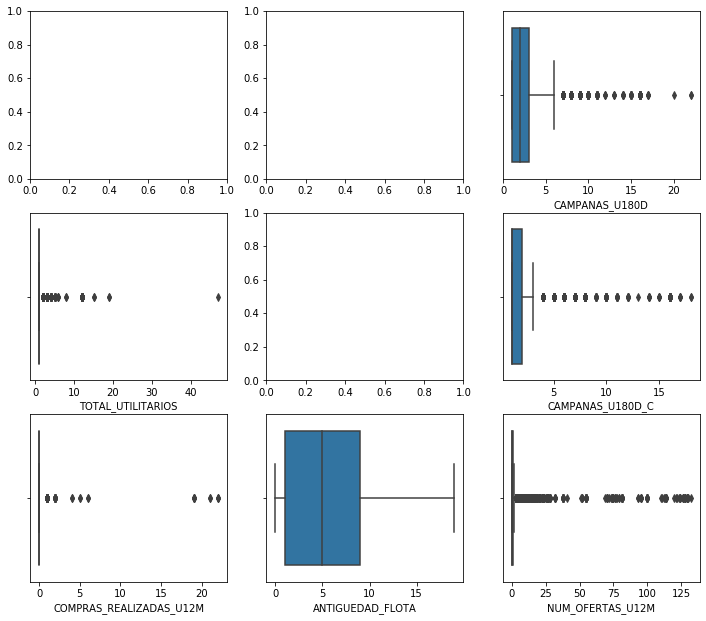

In [11]:
fig, axs = plt.subplots(3,3, figsize = (12,10.5))

plt2 = sns.boxplot(df['TOTAL_UTILITARIOS'], ax = axs[1,0])
plt2 = sns.boxplot(df['ANTIGUEDAD_FLOTA'], ax = axs[2,1])
plt2 = sns.boxplot(df['CAMPANAS_U180D_C'], ax = axs[1,2])
plt2 = sns.boxplot(df['NUM_OFERTAS_U12M'], ax = axs[2,2])
plt2 = sns.boxplot(df['CAMPANAS_U180D'], ax = axs[0,2])
plt2 = sns.boxplot(df['COMPRAS_REALIZADAS_U12M'], ax = axs[2,0])

plt.show()

ahi un exceso de variabilidad en algunas columnas

In [12]:
#estas variables no pueden ser imputadas porque indican que no tienen vehiculos, candidatas a irse de la base!!
df['TOTAL_UTILITARIOS'] = df['TOTAL_UTILITARIOS'].replace(np.nan,0)
df['UTILITARIOS_EXCLUSION'] = df['UTILITARIOS_EXCLUSION'].replace(np.nan,0)
df['RELEVANTE_CAMIONES'] = df['RELEVANTE_CAMIONES'].replace(np.nan,0)
df['RELEVANTE_OTROS'] = df['RELEVANTE_OTROS'].replace(np.nan,0)

### columnas categoricas

In [13]:
df[['MARCA_AGRUPADA','DESC_TIPO_VEHICULO']].describe()

,MARCA_AGRUPADA,DESC_TIPO_VEHICULO
count,19892,19736
unique,8,17
top,MERCEDES-BENZ,BUS
freq,12321,4794


In [14]:
avr_mar=pd.DataFrame(df.groupby('MARCA_AGRUPADA')["COMPRO_NUM"].mean())
avr_mar=avr_mar.sort_values("COMPRO_NUM",ascending=False)
avr_mar.head(50)

,COMPRO_NUM
MARCA_AGRUPADA,
POWERSYSTEMS,0.058824
MERCEDES-BENZ,0.020128
TREMAC,0.017361
MITSUBISHI-FUSO,0.003542
FREIGHTLINER,0.002404
GREAT DANE,0.000000
HEIL,0.000000
WESTERN STAR,0.000000


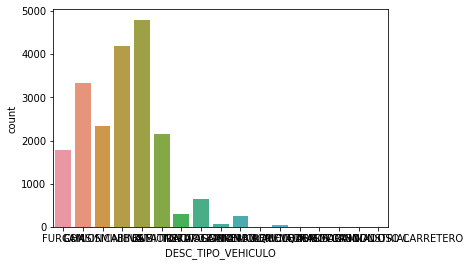

In [15]:
df['DESC_TIPO_VEHICULO'] = df['DESC_TIPO_VEHICULO'].replace(np.nan,'CAMION')
plt1 = sns.countplot(df['DESC_TIPO_VEHICULO'])
plt.show()

In [16]:
df[['FLOTA_NUEVA','ANTIGUEDAD_FLOTA']].describe()

,FLOTA_NUEVA,ANTIGUEDAD_FLOTA
count,2195.000000,2195.000000
mean,0.117540,5.771337
std,0.322136,4.733600
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,5.000000
75%,0.000000,9.000000
max,1.000000,19.000000


In [17]:
# estos valores corresponden a flotas, si estan vacion significa que no tienen flota o bien no tienen flota nueva
df['FLOTA_NUEVA'] = df['FLOTA_NUEVA'].replace(np.nan,0)

#se debe trabajar en esto
df['CAMPANAS_U180D'] = df['CAMPANAS_U180D'].replace(np.nan,0)
df['CAMPANAS_U180D_C'] = df['CAMPANAS_U180D_C'].replace(np.nan,0)
df['ANTIGUEDAD_FLOTA'] = df['ANTIGUEDAD_FLOTA'].replace(np.nan,0)

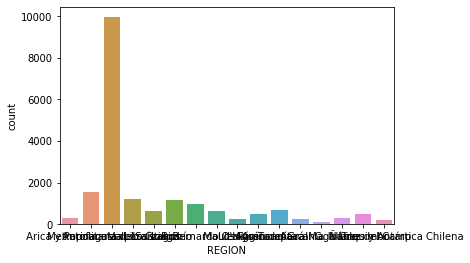

,REGION
count,19294
unique,16
top,Metropolitana de Santiago
freq,9955


In [18]:
plt1 = sns.countplot(df['REGION'])
plt.show(),
df[['REGION']].describe()

In [19]:
df['REGION'] = df['REGION'].replace(np.nan,'NA')

In [27]:
#df[['COMUNA_CRM']].describe()

In [33]:
#df['COMUNA_CRM'] = df['COMUNA_CRM'].replace(np.nan,'NA')

In [34]:
df[['DESC_TIPO_VEHICULO']].describe()

,DESC_TIPO_VEHICULO
count,19892
unique,17
top,BUS
freq,4794


In [35]:
df['DESC_TIPO_VEHICULO'] = df['DESC_TIPO_VEHICULO'].replace(np.nan,'NA')

In [36]:
df[['TIPO_CREDITO_USADO_ANT']].describe()

,TIPO_CREDITO_USADO_ANT
count,19892
unique,6
top,NA
freq,18774


In [37]:
df['TIPO_CREDITO_USADO_ANT'] = df['TIPO_CREDITO_USADO_ANT'].replace(np.nan,'NA')

In [38]:
#cantidad de missing
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19892 entries, 0 to 212231
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TOTAL_UTILITARIOS         19892 non-null  float64
 1   UTILITARIOS_EXCLUSION     19892 non-null  float64
 2   RELEVANTE_BUSES           19892 non-null  float64
 3   RELEVANTE_CAMIONES        19892 non-null  float64
 4   RELEVANTE_RODADOS         19892 non-null  float64
 5   RELEVANTE_VANS            19892 non-null  float64
 6   RELEVANTE_CARGA           19892 non-null  float64
 7   RELEVANTE_PASAJERA        19892 non-null  float64
 8   RELEVANTE_PESADO          19892 non-null  float64
 9   RELEVANTE_CAMIONETA       19892 non-null  float64
 10  RELEVANTE_MEDIANO         19892 non-null  float64
 11  RELEVANTE_OTROS           19892 non-null  float64
 12  RELEVANTE_LIVIANO         19892 non-null  float64
 13  RELEVANTE_CAMIONETA_DCAB  19892 non-null  float64
 14  RELEV

In [39]:
numericas = [['TOTAL_UTILITARIOS',
'UTILITARIOS_EXCLUSION',
'RELEVANTE_BUSES',
'RELEVANTE_CAMIONES',
'RELEVANTE_RODADOS',
'RELEVANTE_VANS',
'RELEVANTE_CARGA',
'RELEVANTE_PASAJERA',
'RELEVANTE_PESADO',
'RELEVANTE_CAMIONETA',
'RELEVANTE_MEDIANO',
'RELEVANTE_OTROS',
'RELEVANTE_LIVIANO',
'RELEVANTE_CAMIONETA_DCAB',
'RELEVANTE_FORESTAL',
'FLOTA_NUEVA',
'ANTIGUEDAD_FLOTA',
'CAMPANAS_U180D',
'CAMPANAS_U180D_C',
'NUM_OFERTAS_U12M',
'COMPRAS_REALIZADAS_U12M',
'CAMPANAS_U180D_C',
'NUM_OFERTAS_U12M',
'COMPRAS_REALIZADAS_U12M']]

df1=df

for i in numericas:
    df1[i]=(df[i]-df1[i].mean())/df1[i].std()

In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19892 entries, 0 to 212231
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TOTAL_UTILITARIOS         19892 non-null  float64
 1   UTILITARIOS_EXCLUSION     19892 non-null  float64
 2   RELEVANTE_BUSES           19892 non-null  float64
 3   RELEVANTE_CAMIONES        19892 non-null  float64
 4   RELEVANTE_RODADOS         19892 non-null  float64
 5   RELEVANTE_VANS            19892 non-null  float64
 6   RELEVANTE_CARGA           19892 non-null  float64
 7   RELEVANTE_PASAJERA        19892 non-null  float64
 8   RELEVANTE_PESADO          19892 non-null  float64
 9   RELEVANTE_CAMIONETA       19892 non-null  float64
 10  RELEVANTE_MEDIANO         19892 non-null  float64
 11  RELEVANTE_OTROS           19892 non-null  float64
 12  RELEVANTE_LIVIANO         19892 non-null  float64
 13  RELEVANTE_CAMIONETA_DCAB  19892 non-null  float64
 14  RELEV

## Exploración
Practicamente todos los grupos tienen una baja conversion pero existen diferencias en promedio

### Análisis por columna

 la variable COMPRO_NUM corresponde a una variable indicadora de si compra o no lo ofertado
#(1) compra (0) no compra

In [41]:
conversion = (sum(df1['COMPRO_NUM'])/len(df1['COMPRO_NUM'].index))*100
conversion

1.4226824854212747

Una conversion tan baja requiere balance de la información

### REGION

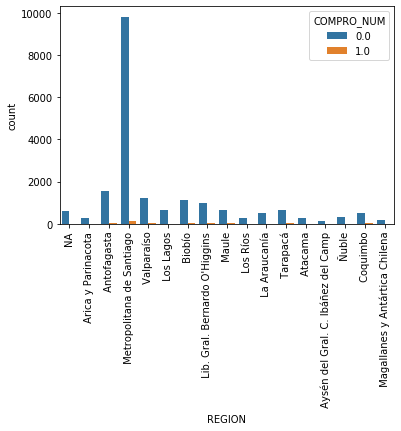

REGION
NA                                     0.003344
 Antofagasta                           0.010961
 Arica y Parinacota                    0.024476
 Atacama                               0.003984
 Aysén del Gral. C. Ibáñez del Camp    0.009174
 Biobío                                0.025305
 Coquimbo                              0.021912
 La Araucanía                          0.015842
 Lib. Gral. Bernardo O'Higgins         0.012085
 Los Lagos                             0.009063
 Los Ríos                              0.022556
 Magallanes y Antártica Chilena        0.005236
 Maule                                 0.019608
 Metropolitana de Santiago             0.013159
 Tarapacá                              0.028065
 Valparaíso                            0.010735
 Ñuble                                 0.018405
Name: COMPRO_NUM, dtype: float64

In [42]:
# la variable la optimize desde sas
sns.countplot(x = "REGION", hue = "COMPRO_NUM", data = df1)
xticks(rotation = 90)
plt.show(),
df1.groupby('REGION')["COMPRO_NUM"].mean() 


### Tipo credito usado anteriormente

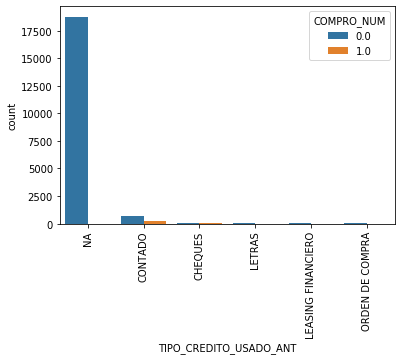

TIPO_CREDITO_USADO_ANT
CHEQUES               0.223684
CONTADO               0.255983
LEASING FINANCIERO    0.045455
LETRAS                0.153846
NA                    0.000533
ORDEN DE COMPRA       0.150000
Name: COMPRO_NUM, dtype: float64

In [43]:
sns.countplot(x = "TIPO_CREDITO_USADO_ANT", hue = "COMPRO_NUM", data = df1)
xticks(rotation = 90)
plt.show(),
df1.groupby('TIPO_CREDITO_USADO_ANT')["COMPRO_NUM"].mean() 

Esto tiene poca logica, pero se usa, si el cliente compra antes, tengo el tipo de credito que ocupa, pero voy a agrupar

In [44]:
df1['TIPO_CREDITO_USADO_ANT'] = df1['TIPO_CREDITO_USADO_ANT'].replace('PAGARE/O.COMPRA/CREDITO SIMPLE','CREDITO')
df1['TIPO_CREDITO_USADO_ANT'] = df1['TIPO_CREDITO_USADO_ANT'].replace('LEASING FINANCIERO','LEASING')

### Ofertas realizadas anteriormente

0.021453236839310115

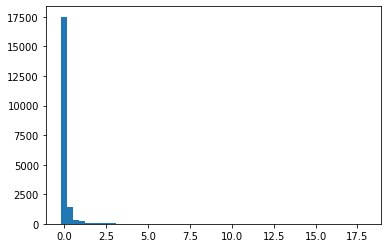

In [45]:
plt.hist(df1["NUM_OFERTAS_U12M"],bins=50)
plt.show

df1['NUM_OFERTAS_U12M'].corr(df1["COMPRO_NUM"])

### Servicios PV

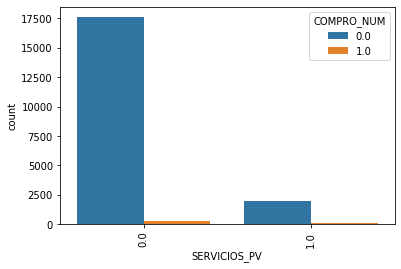

SERVICIOS_PV
0.0    0.012441
1.0    0.029785
Name: COMPRO_NUM, dtype: float64

In [46]:
sns.countplot(x = "SERVICIOS_PV", hue = "COMPRO_NUM", data = df1)
xticks(rotation = 90)
plt.show(),
df1.groupby('SERVICIOS_PV')["COMPRO_NUM"].mean() 

## Dummificacion de variables

In [47]:
def variables_dummy(dataset,variable):
    cat_dummies = pd.get_dummies(dataset[variable],prefix=variable)
    #.iloc[:,1:]
    data_new = dataset.join(cat_dummies)
    dataset = data_new.drop([variable],axis=1)
    return dataset

In [48]:
df3=df1

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19892 entries, 0 to 212231
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TOTAL_UTILITARIOS         19892 non-null  float64
 1   UTILITARIOS_EXCLUSION     19892 non-null  float64
 2   RELEVANTE_BUSES           19892 non-null  float64
 3   RELEVANTE_CAMIONES        19892 non-null  float64
 4   RELEVANTE_RODADOS         19892 non-null  float64
 5   RELEVANTE_VANS            19892 non-null  float64
 6   RELEVANTE_CARGA           19892 non-null  float64
 7   RELEVANTE_PASAJERA        19892 non-null  float64
 8   RELEVANTE_PESADO          19892 non-null  float64
 9   RELEVANTE_CAMIONETA       19892 non-null  float64
 10  RELEVANTE_MEDIANO         19892 non-null  float64
 11  RELEVANTE_OTROS           19892 non-null  float64
 12  RELEVANTE_LIVIANO         19892 non-null  float64
 13  RELEVANTE_CAMIONETA_DCAB  19892 non-null  float64
 14  RELEV

In [54]:
tabla=variables_dummy(df3,"DESC_TIPO_VEHICULO")
tabla=variables_dummy(tabla,"MARCA_AGRUPADA")
tabla=variables_dummy(tabla,"REGION")
#tabla=variables_dummy(tabla,"COMUNA_CRM")
tabla=variables_dummy(tabla,"USADO_NUEVO")
tabla=variables_dummy(tabla,"TIPO_CREDITO_USADO_ANT")
#tabla=tabla.drop(["COMUNA_CRM"], axis=1)

In [55]:
y=tabla["COMPRO_NUM"]
x=tabla.drop(["COMPRO_NUM"], axis=1)

In [56]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19892 entries, 0 to 212231
Data columns (total 72 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   TOTAL_UTILITARIOS                              19892 non-null  float64
 1   UTILITARIOS_EXCLUSION                          19892 non-null  float64
 2   RELEVANTE_BUSES                                19892 non-null  float64
 3   RELEVANTE_CAMIONES                             19892 non-null  float64
 4   RELEVANTE_RODADOS                              19892 non-null  float64
 5   RELEVANTE_VANS                                 19892 non-null  float64
 6   RELEVANTE_CARGA                                19892 non-null  float64
 7   RELEVANTE_PASAJERA                             19892 non-null  float64
 8   RELEVANTE_PESADO                               19892 non-null  float64
 9   RELEVANTE_CAMIONETA                            19

# Inicio de modelamiento

### Datos entrenamiento y testeo

como esta desbalanceado, primero divido la muestra pero por estratos

In [57]:
x_res,x_test,y_res,y_test=train_test_split(x,y,test_size=0.2,random_state=1010)

Revisamos como quedan las separaciones

In [58]:
y_res.mean(),y_test.mean(),y_res.shape,y_test.shape

(0.01426506629799535, 0.014073887911535563, (15913,), (3979,))

Tenemos un problema con datos desbalanceados, por lo que revisemos como se comporta este desbalance utilizando un modelo sde random forest como base inicial

In [59]:
from  sklearn.ensemble import RandomForestClassifier
modelo_rfc = RandomForestClassifier().fit(x_res, y_res)

In [60]:
#evaluacion del modelo
mediciones(x_res,y_res,x_test,y_test,modelo_rfc)   

Matriz de confusion:
                   Prediccion falso  Prediccion verdadero
Actual falsa                  3906                    17
Actual verdadera                47                     9


,Entrenamiento,Testeo
Accuracy,0.993,0.983
recall,0.621,0.160
roc,0.997,0.934
f1,0.730,0.219


El recall es muy bajo y se ve afectado el f1, es necesario balancear los datos

### Balanceo de datos de entrenamiento

Tengo la opcion de bajar o subir la muestra, a modo de no perder informacion se sube

In [61]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE 
nm = SMOTE(random_state = 10101) 
#nm = NearMiss(random_state = 10101)

Using TensorFlow backend.


In [62]:
x_train,y_train=nm.fit_resample(x_res,y_res)

Reviso dimenciones nuevamente

In [63]:
y_res.shape, y_res.mean(), y_train.shape,y_train.mean()

((15913,), 0.01426506629799535, (31372,), 0.5)

# Modelamiento con datos balanceados

La estrategia en este caso es utilizar regresion logistica, en el caso de obtener un pobre ajuste, se utilitan varios modelos para probar

## Regresion logistica como modelo base

Utilizo regresion loistica y una busqueda por gridsearch para encontrar mejores hiperparametros

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


grid={"C":np.logspace(-3,3,3), "penalty":["l2"]}

logreg=LogisticRegression()

logreg_cv=GridSearchCV(logreg,grid,cv=5,scoring='f1',verbose=0)

In [65]:
logreg_cv.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e+00, 1.e+03]),
                         'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [66]:
logreg_cv.best_params_

{'C': 1000.0, 'penalty': 'l2'}

In [67]:
logreg=LogisticRegression(C=1000,penalty='l2')
logreg.fit(x_train,y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
mediciones(x_train,y_train,x_test,y_test,logreg)   

Matriz de confusion:
                   Prediccion falso  Prediccion verdadero
Actual falsa                  3781                   142
Actual verdadera                10                    46


,Entrenamiento,Testeo
Accuracy,0.981,0.961
recall,0.995,0.821
roc,0.995,0.944
f1,0.981,0.377


Se aprecia un claro bajo ajuste, veamos si aplicamos otros modelos podemos mejorar esto (al menos el recall y press deben estar sobre 50%)

## Multi-modelos

Para evita probar uno a uno los modelos, se seleccionan varios y luego se verifica los con mejor rendimiento para hacer una busqueda ampliada de los mejores con gridsearch

In [69]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,VotingClassifier,StackingClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier          
              

modelos = [["LR","SVC","RF","TREE","MLP","GBOOST","ADABOOST","GRBOOST"],
           [
            LogisticRegression(C=1,penalty='l2'),  
            svm.SVC(max_iter=50),
            RandomForestClassifier(),
            DecisionTreeClassifier(),
            MLPClassifier(),
            GaussianNB(),
            AdaBoostClassifier(),
            GradientBoostingClassifier()]
          ]
warnings.filterwarnings("ignore")

resultados=[]
predicion=[]
error=[]
precision=[]
a=0
for i in modelos[1]:
    ajuste=i.fit(x_train,y_train)
    resultados.append(ajuste)
    predicion.append(ajuste.predict(x_test))
    er = i.score(x_test,y_test)
    error.append(er)
    precision.append(ajuste.score(x_test , y_test))
    print("\n modelo:",modelos[0][a])
    print(mediciones2(x_train,y_train,x_test,y_test,ajuste))
    print("f1 score:",int(f1_score(y_test,ajuste.predict(x_test))*1000)/1000)
    if modelos[0][a]!='SVC':
        print("roc-auc:", roc_auc_score(y_test,ajuste.predict_proba(x_test)[:,1]))
    print(confusion_matrix(y_test,ajuste.predict(x_test)))
    a=a+1


 modelo: LR
          Testeo
Accuracy   0.959
recall     0.875
f1 score: 0.375
roc-auc: 0.9524575761989731
[[3767  156]
 [   7   49]]

 modelo: SVC
          Testeo
Accuracy   0.438
recall     0.821
f1 score: 0.039
[[1700 2223]
 [  10   46]]

 modelo: RF
          Testeo
Accuracy   0.977
recall     0.375
f1 score: 0.315
roc-auc: 0.9335944612359346
[[3867   56]
 [  35   21]]

 modelo: TREE
          Testeo
Accuracy   0.978
recall     0.285
f1 score: 0.275
roc-auc: 0.6820126725173882
[[3879   44]
 [  40   16]]

 modelo: MLP
          Testeo
Accuracy   0.972
recall     0.553
f1 score: 0.362
roc-auc: 0.9360798040857944
[[3839   84]
 [  25   31]]

 modelo: GBOOST
          Testeo
Accuracy   0.279
recall     0.964
f1 score: 0.036
roc-auc: 0.6305874695022032
[[1060 2863]
 [   2   54]]

 modelo: ADABOOST
          Testeo
Accuracy   0.964
recall     0.928
f1 score: 0.421
roc-auc: 0.9709201230836458
[[3784  139]
 [   4   52]]

 modelo: GRBOOST
          Testeo
Accuracy   0.968
recall     0.875


Siguiente paso es usar gridsearch para buscar la mejor version de cada uno usando como referencia para los mejores en f1 (arbol de decision, random forest, mlp, adaboost)

## Tree Clasificador Tunning

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(1,8,1)), 
              "min_samples_leaf": list(range(5,18,1))}

tree_cv = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=3,n_jobs=-1,verbose=10).fit(x_train,y_train)


Fitting 3 folds for each of 182 candidates, totalling 546 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

In [71]:
mediciones(x_train,y_train,x_test,y_test,tree_cv)

Matriz de confusion:
                   Prediccion falso  Prediccion verdadero
Actual falsa                  3808                   115
Actual verdadera                13                    43


,Entrenamiento,Testeo
Accuracy,0.981,0.967
recall,0.990,0.767
roc,0.989,0.922
f1,0.981,0.401


No mejoro mucho respecto a lo que ya estaba ajustado (claso sobre ajuste)

## Random Forest Tunning

In [72]:
## from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators'      : [25,30,50],
    'max_depth'         : [8,10,15],
    'random_state'      : [0]}

rf_cv = GridSearchCV(RandomForestClassifier(), parameters, cv=3, n_jobs=-1,verbose=10).fit(x_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  15 out of  27 | elapsed:    2.2s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  18 out of  27 | elapsed:    3.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  21 out of  27 | elapsed:    3.3s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  24 out of  27 | elapsed:    4.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    4.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    4.5s finished


In [73]:
rf_cv.best_params_

{'max_depth': 15, 'n_estimators': 25, 'random_state': 0}

In [74]:
mediciones(x_train,y_train,x_test,y_test,rf_cv)

Matriz de confusion:
                   Prediccion falso  Prediccion verdadero
Actual falsa                  3820                   103
Actual verdadera                11                    45


,Entrenamiento,Testeo
Accuracy,0.985,0.971
recall,0.992,0.803
roc,0.997,0.968
f1,0.985,0.441


Los modelos que revisare en mayor profundidad son la rn, adaboost y randomforest

## Adaboost con grid search

In [75]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'base_estimator__max_depth':[10,13,15]}

gs = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier()), params,cv=3,verbose=10,n_jobs=-1)

#print(gs.best_estimator_)

In [76]:
gs.fit(x_train,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:    7.4s remaining:   26.1s
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:    7.4s remaining:   14.9s
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    7.5s remaining:    9.4s
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:    7.9s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:    8.3s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:    8.3s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   11.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   11.0s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
 

In [77]:
gs.best_params_

{'base_estimator__max_depth': 13}

In [78]:
mediciones(x_train,y_train,x_test,y_test,gs)

Matriz de confusion:
                   Prediccion falso  Prediccion verdadero
Actual falsa                  3877                    46
Actual verdadera                36                    20


,Entrenamiento,Testeo
Accuracy,0.995,0.979
recall,0.996,0.357
roc,0.999,0.896
f1,0.995,0.327


Teniendo en cuenta los ajustes actuales es un buen ajuste pero el recall es muy bajo, veamos mas opciones

## Clasificador por Multi-Layer-Perc.  (RN)

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

parameters = {'solver': ['lbfgs'], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[10101]}
mlp_cv = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1,verbose=10,cv=3,scoring='f1')


In [80]:
mlp_cv.fit(x_train,y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   52.9s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  3.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([1.

In [81]:
mlp_cv.best_params_

{'alpha': 1e-05,
 'hidden_layer_sizes': 14,
 'random_state': 10101,
 'solver': 'lbfgs'}

In [82]:
mediciones(x_train,y_train,x_test,y_test,mlp_cv)

Matriz de confusion:
                   Prediccion falso  Prediccion verdadero
Actual falsa                  3827                    96
Actual verdadera                14                    42


,Entrenamiento,Testeo
Accuracy,0.987,0.972
recall,0.996,0.750
roc,0.997,0.945
f1,0.987,0.432


Mejora el recall pero caemos en el accuracy, igualmente roc esta muy bueno

Ya tengo la mejor version de estos 3 modelos, antes de escojer uno de ellos ¿juntemoslos todos y veamos si la union de todos es mejor que uno solo?

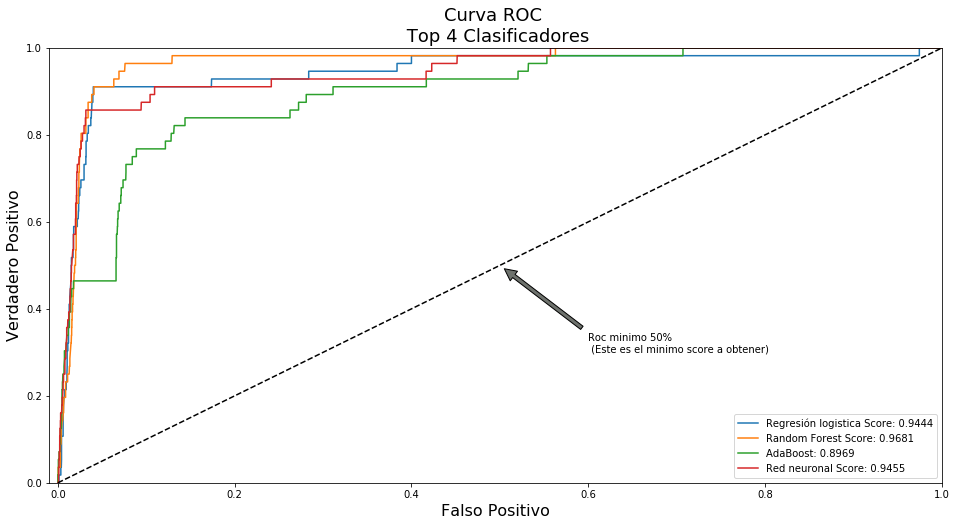

In [83]:
log_reg_pred = logreg_cv.predict_proba(x_test)[:,1]
rf_pred = rf_cv.predict_proba(x_test)[:,1]
ada_pred = gs.predict_proba(x_test)[:,1]
rn_pred = mlp_cv.predict_proba(x_test)[:,1]

log_fpr, log_tpr, log_thresold = roc_curve(y_test, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_test, rf_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, ada_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test,rn_pred)


plt.figure(figsize=(16,8))
plt.title('Curva ROC \n Top 4 Clasificadores', fontsize=18)
plt.plot(log_fpr, log_tpr, label='Regresión logistica Score: {:.4f}'.format(roc_auc_score(y_test, log_reg_pred)))
plt.plot(knear_fpr, knear_tpr, label='Random Forest Score: {:.4f}'.format(roc_auc_score(y_test, rf_pred)))
plt.plot(svc_fpr, svc_tpr, label='AdaBoost: {:.4f}'.format(roc_auc_score(y_test, ada_pred)))
plt.plot(tree_fpr, tree_tpr, label='Red neuronal Score: {:.4f}'.format(roc_auc_score(y_test, rn_pred)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('Falso Positivo', fontsize=16)
plt.ylabel('Verdadero Positivo', fontsize=16)
plt.annotate('Roc minimo 50% \n (Este es el minimo score a obtener)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
plt.legend()
    
plt.show()

# Conclusión 22-05-2020

Todos los modelos se comportan bastante bien en el porceso de ajuste, sin embargo destacan random forest y regresion logistica como modelos con mejor performance respecto a nuestros objetivos.

De estos ultimos si se toma en consideracion los indicadores de recall y f1 existe una ventaja por random forest.

Confusion matrix Random Forest:
 [[3820  103]
 [  11   45]]


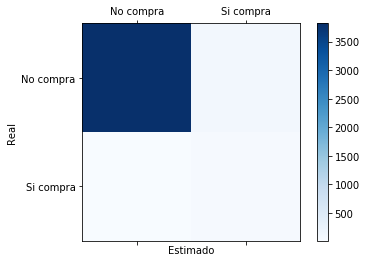

In [84]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=rf_cv.predict(x_test))
print('Confusion matrix Random Forest:\n', conf_mat)

labels = ['No compra', 'Si compra']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Estimado')
plt.ylabel('Real')
plt.show()

# Exportación del modelo

In [85]:
import pickle

filename = 'lead_score_utilitario_persona_modelo.sav'

pickle.dump(rf_cv, open(filename, 'wb'))

In [86]:
rf_cv.best_estimator_.feature_importances_

array([2.31730264e-03, 1.19576957e-02, 2.18423784e-03, 1.29580656e-03,
       6.64091021e-05, 2.09779484e-03, 9.02137663e-04, 4.71231914e-03,
       2.67670035e-04, 2.56049402e-05, 2.24247827e-05, 1.16089617e-03,
       1.02691191e-04, 0.00000000e+00, 0.00000000e+00, 7.78484099e-04,
       2.87351947e-03, 2.42525282e-02, 2.07173247e-02, 6.40149973e-03,
       1.05136972e-01, 6.86086565e-03, 0.00000000e+00, 1.21752737e-02,
       2.22969359e-03, 5.15037711e-03, 5.68026031e-07, 6.76779433e-03,
       0.00000000e+00, 1.44460495e-03, 2.38506083e-04, 3.35418436e-03,
       1.04092557e-05, 0.00000000e+00, 5.37167854e-05, 4.85501223e-04,
       4.69370713e-04, 5.72773432e-03, 0.00000000e+00, 9.01059725e-04,
       0.00000000e+00, 0.00000000e+00, 8.79912670e-03, 2.62649898e-02,
       1.36858907e-04, 4.76657980e-04, 0.00000000e+00, 1.01625369e-03,
       4.27656333e-03, 4.38721001e-04, 3.85821531e-04, 9.96059587e-05,
       4.95730438e-04, 1.31087482e-03, 8.19689767e-04, 8.54639317e-04,
      

In [93]:
for feat, importance in zip(x_train.columns, rf_cv.best_estimator_.feature_importances_):
    print ('feature: {f}, importance: {i}'.format(f=feat, i=importance))

feature: TOTAL_UTILITARIOS, importance: 0.002317302638628099
feature: UTILITARIOS_EXCLUSION, importance: 0.011957695681148139
feature: RELEVANTE_BUSES, importance: 0.002184237835822349
feature: RELEVANTE_CAMIONES, importance: 0.001295806563048055
feature: RELEVANTE_RODADOS, importance: 6.640910209367036e-05
feature: RELEVANTE_VANS, importance: 0.0020977948445665274
feature: RELEVANTE_CARGA, importance: 0.0009021376632385344
feature: RELEVANTE_PASAJERA, importance: 0.004712319136345207
feature: RELEVANTE_PESADO, importance: 0.00026767003483123096
feature: RELEVANTE_CAMIONETA, importance: 2.5604940198725096e-05
feature: RELEVANTE_MEDIANO, importance: 2.2424782749914494e-05
feature: RELEVANTE_OTROS, importance: 0.0011608961730437933
feature: RELEVANTE_LIVIANO, importance: 0.00010269119143049324
feature: RELEVANTE_CAMIONETA_DCAB, importance: 0.0
feature: RELEVANTE_FORESTAL, importance: 0.0
feature: FLOTA_NUEVA, importance: 0.0007784840992784808
feature: ANTIGUEDAD_FLOTA, importance: 0.0028